## Pegando as imagens

Em um primeiro momento, vamos pegar as images, já em preto e branco, e popular a matriz

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import re
import pprint as pp


In [ ]:
dataset_path = "imgs_2/"
images  = os.listdir(dataset_path)
print(images)
width  = 100
height = 120

['Camacho.jpg', 'Camacho_1.jpg', 'Wagner_1.jpg', 'Yuri_3.jpg', 'Yuri.jpg', 'Renato.jpg', 'Renato_1.jpg', 'Yuri_2.jpg', 'Yuri_1.jpg', 'Wagner_3.jpg', 'Camacho_3.jpg', 'Renato_2.jpg', 'Renato_3.jpg', 'Wagner.jpg', 'Camacho_2.jpg', 'Wagner_2.jpg']


In [ ]:
train_images = []
test_images = []
def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))
   
for i in images:
    test = hasNumbers(i)
    if test == False:
        train_images.append(i)
    else:
        test_images.append(i)

train_images

['Camacho.jpg', 'Yuri.jpg', 'Renato.jpg', 'Wagner.jpg']

In [ ]:
training_tensor = np.ndarray(shape=(len(train_images), height*width), dtype=np.float64) # Matriz contendo as imagens. Cada linha é uma imagem

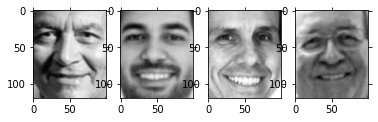

In [ ]:
for i in range(0, len(train_images)):
    img = plt.imread(dataset_path + train_images[i])
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()


Test Images:


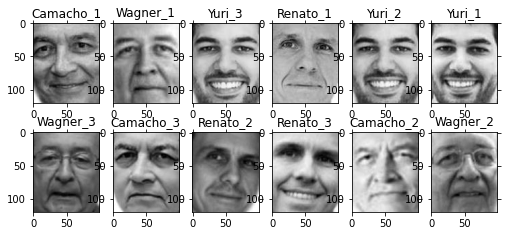

In [ ]:
print('Test Images:')
testing_tensor   = np.ndarray(shape=(len(test_images), height*width), dtype=np.float64) # Essa é a matriz com as imagens que serão testadas posteriormente

for i in range(len(test_images)):
    img = imread(dataset_path + test_images[i])
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(3,6,1+i)
    plt.title(test_images[i].split('.')[0])
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Face média

Cálculo da face média

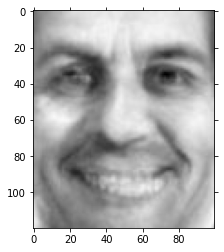

In [ ]:
mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(train_images))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Faces normalizadas

Centrando os dados

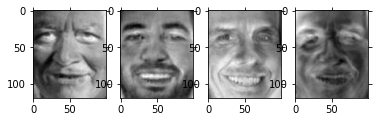

In [ ]:
normalised_training_tensor = np.ndarray(shape=(len(train_images), height*width)) # Matriz A

for i in range(len(train_images)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

for i in range(len(train_images)):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Matriz de Covariância

Matriz $$AA^t$$

In [ ]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,4.0)
print('Covariance matrix of X: \n%s' %cov_matrix)

eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix) # Autovalores e autovetores de AA^t, ou seja, matriz V
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

Covariance matrix of X: 
[[ 559.75873759  -45.4908977  -302.59957864 -211.66826125]
 [ -45.4908977   184.80525058  -82.2391484   -57.07520448]
 [-302.59957864  -82.2391484   369.00186736   15.83685968]
 [-211.66826125  -57.07520448   15.83685968  252.90660606]]
Eigenvectors of Cov(X): 
[[ 0.79302179 -0.5         0.25428972 -0.23759877]
 [ 0.03753534 -0.5        -0.80581048  0.31505644]
 [-0.52662253 -0.5         0.01699541 -0.68729897]
 [-0.3039346  -0.5         0.53452536  0.60984129]]

Eigenvalues of Cov(X): 
[8.39677335e+02 5.00602164e-14 2.38755528e+02 2.88039599e+02]


## Variância Cumulativa

Análise PCA

Cumulative proportion of variance explained vector: 
[0.61448537 0.825276   1.         1.        ]


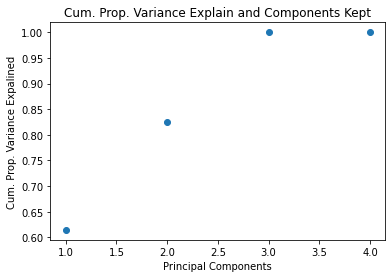

In [ ]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

## Matriz $$V^t$$

In [ ]:
reduced_data = np.array(eigvectors_sort[:4]).transpose() # Matriz V^t
reduced_data

array([[ 0.79302179, -0.23759877,  0.25428972, -0.5       ],
       [ 0.03753534,  0.31505644, -0.80581048, -0.5       ],
       [-0.52662253, -0.68729897,  0.01699541, -0.5       ],
       [-0.3039346 ,  0.60984129,  0.53452536, -0.5       ]])

In [ ]:
eigenfaces = np.dot(training_tensor.transpose(),reduced_data) # Sendo u = Av^t
eigenfaces = eigenfaces.transpose() # Eigenfaces

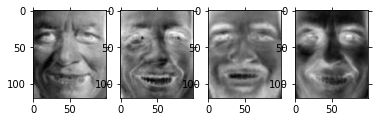

In [ ]:
for i in range(eigenfaces.shape[0]):
    img = eigenfaces[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Reconhecimento facial

In [ ]:
weights = np.array([np.dot(eigenfaces,i) for i in normalised_training_tensor])
weights

array([[ 3.26674309e+07, -8.48469205e+05,  4.76878077e+06,
         7.99971362e+06],
       [ 4.20859091e+05,  5.97029464e+05, -1.20955075e+07,
        -3.54427744e+07],
       [-2.43653028e+07, -2.03169027e+07, -8.03910030e+06,
        -8.89601274e+07],
       [-8.72298716e+06,  2.05683424e+07,  1.53658270e+07,
         1.16403188e+08]])

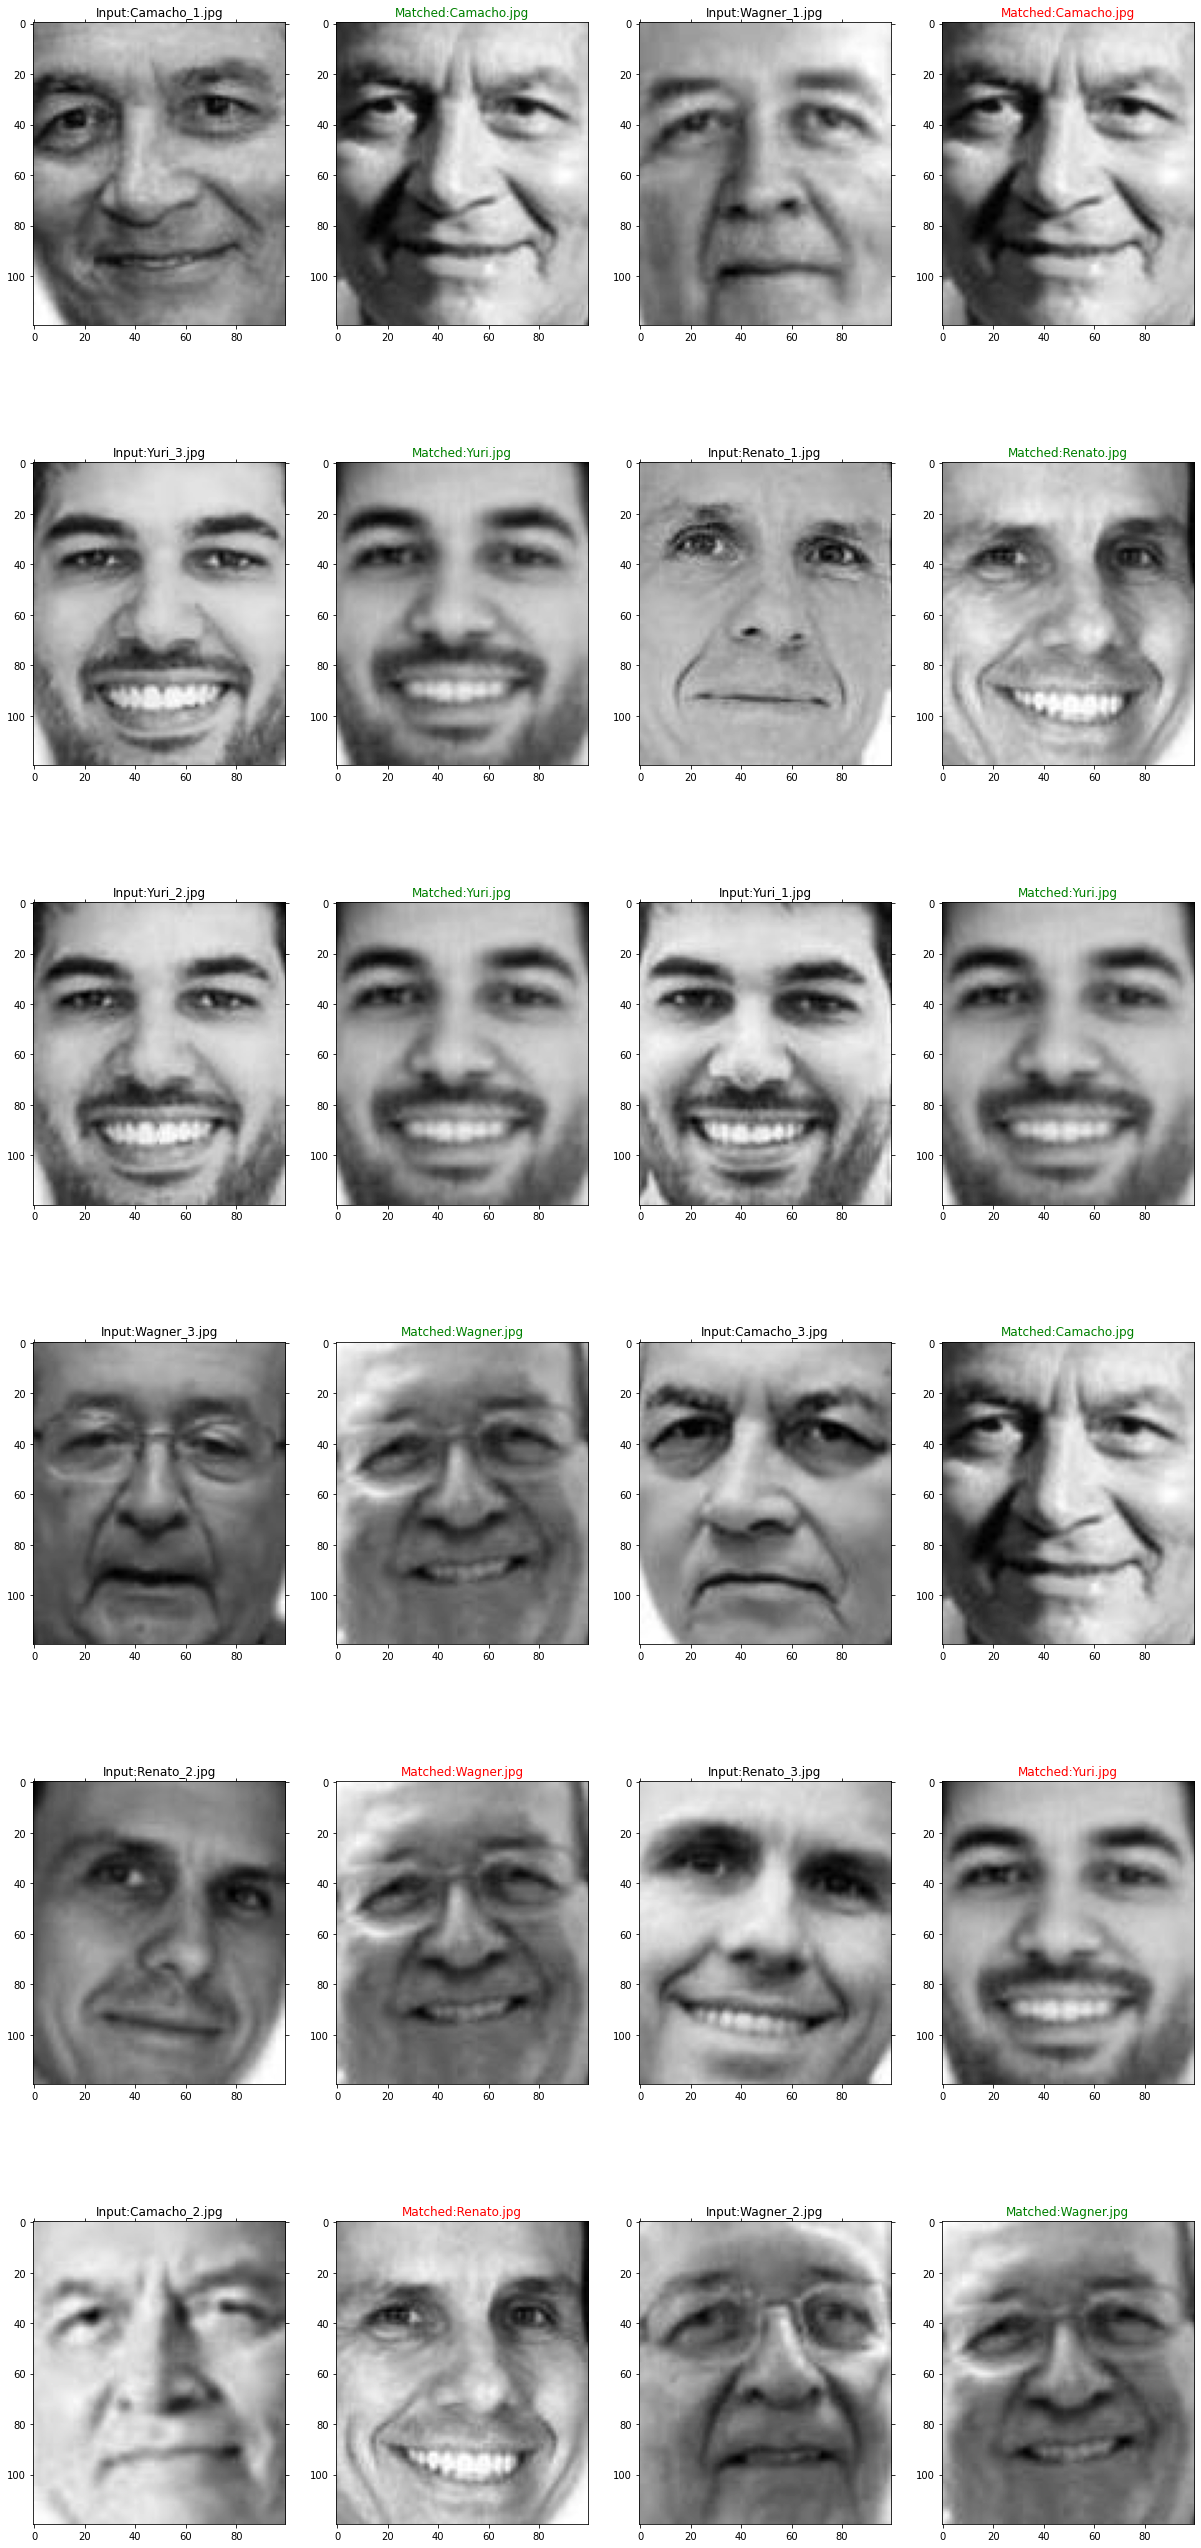

Correct predictions: 8/12 = 66.66666666666666%


In [ ]:
count        = 0
num_images   = 0
correct_pred = 0
def recogniser(img, train_images,eigenfaces,weights):
    global count,highest_min,num_images,correct_pred
    face_test = plt.imread(dataset_path+img)
    num_images += 1
    face_test_v= np.array(face_test, dtype='float64').flatten()
    normalised_face_test = np.subtract(face_test_v,mean_face)
    
    plt.subplot(6,4,1+count)
    plt.imshow(face_test, cmap='gray')
    plt.title("Input:"+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    weights_test = np.dot(eigenfaces, normalised_face_test)
    dif  = weights - weights_test
    normas = np.linalg.norm(dif, axis=1)
    index = np.argmin(normas)

    t0 = 200000000
    t1 = 300000000

    
    if normas[index] < t1:
        plt.subplot(6,4,1+count)
        if normas[index] < t0: # It's a face
            if train_images[index].split(".")[0] in img.split(".")[0]:
                plt.title('Matched:'+'.'.join(train_images[index].split('.')[:2]), color='g')
                plt.imshow(imread('a/'+train_images[index]), cmap='gray')

                correct_pred += 1
            else:
                plt.title('Matched:'+'.'.join(train_images[index].split('.')[:2]), color='r')
                plt.imshow(imread('a/'+train_images[index]), cmap='gray')
        else:
            if img.split('.')[0] not in [i.split('.')[0] for i in train_images]: #and img.split('.')[0] != 'apple':
                plt.title('Unknown face!', color='g')
                correct_pred += 1
            else:
                plt.title('Unknown face!', color='r')
        #plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
    else:     
        plt.subplot(6,4,1+count)
        plt.title('Not a face!', color='r')
        correct_pred += 1
        #plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_images)):
    recogniser(test_images[i], train_images,eigenfaces,weights)

plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

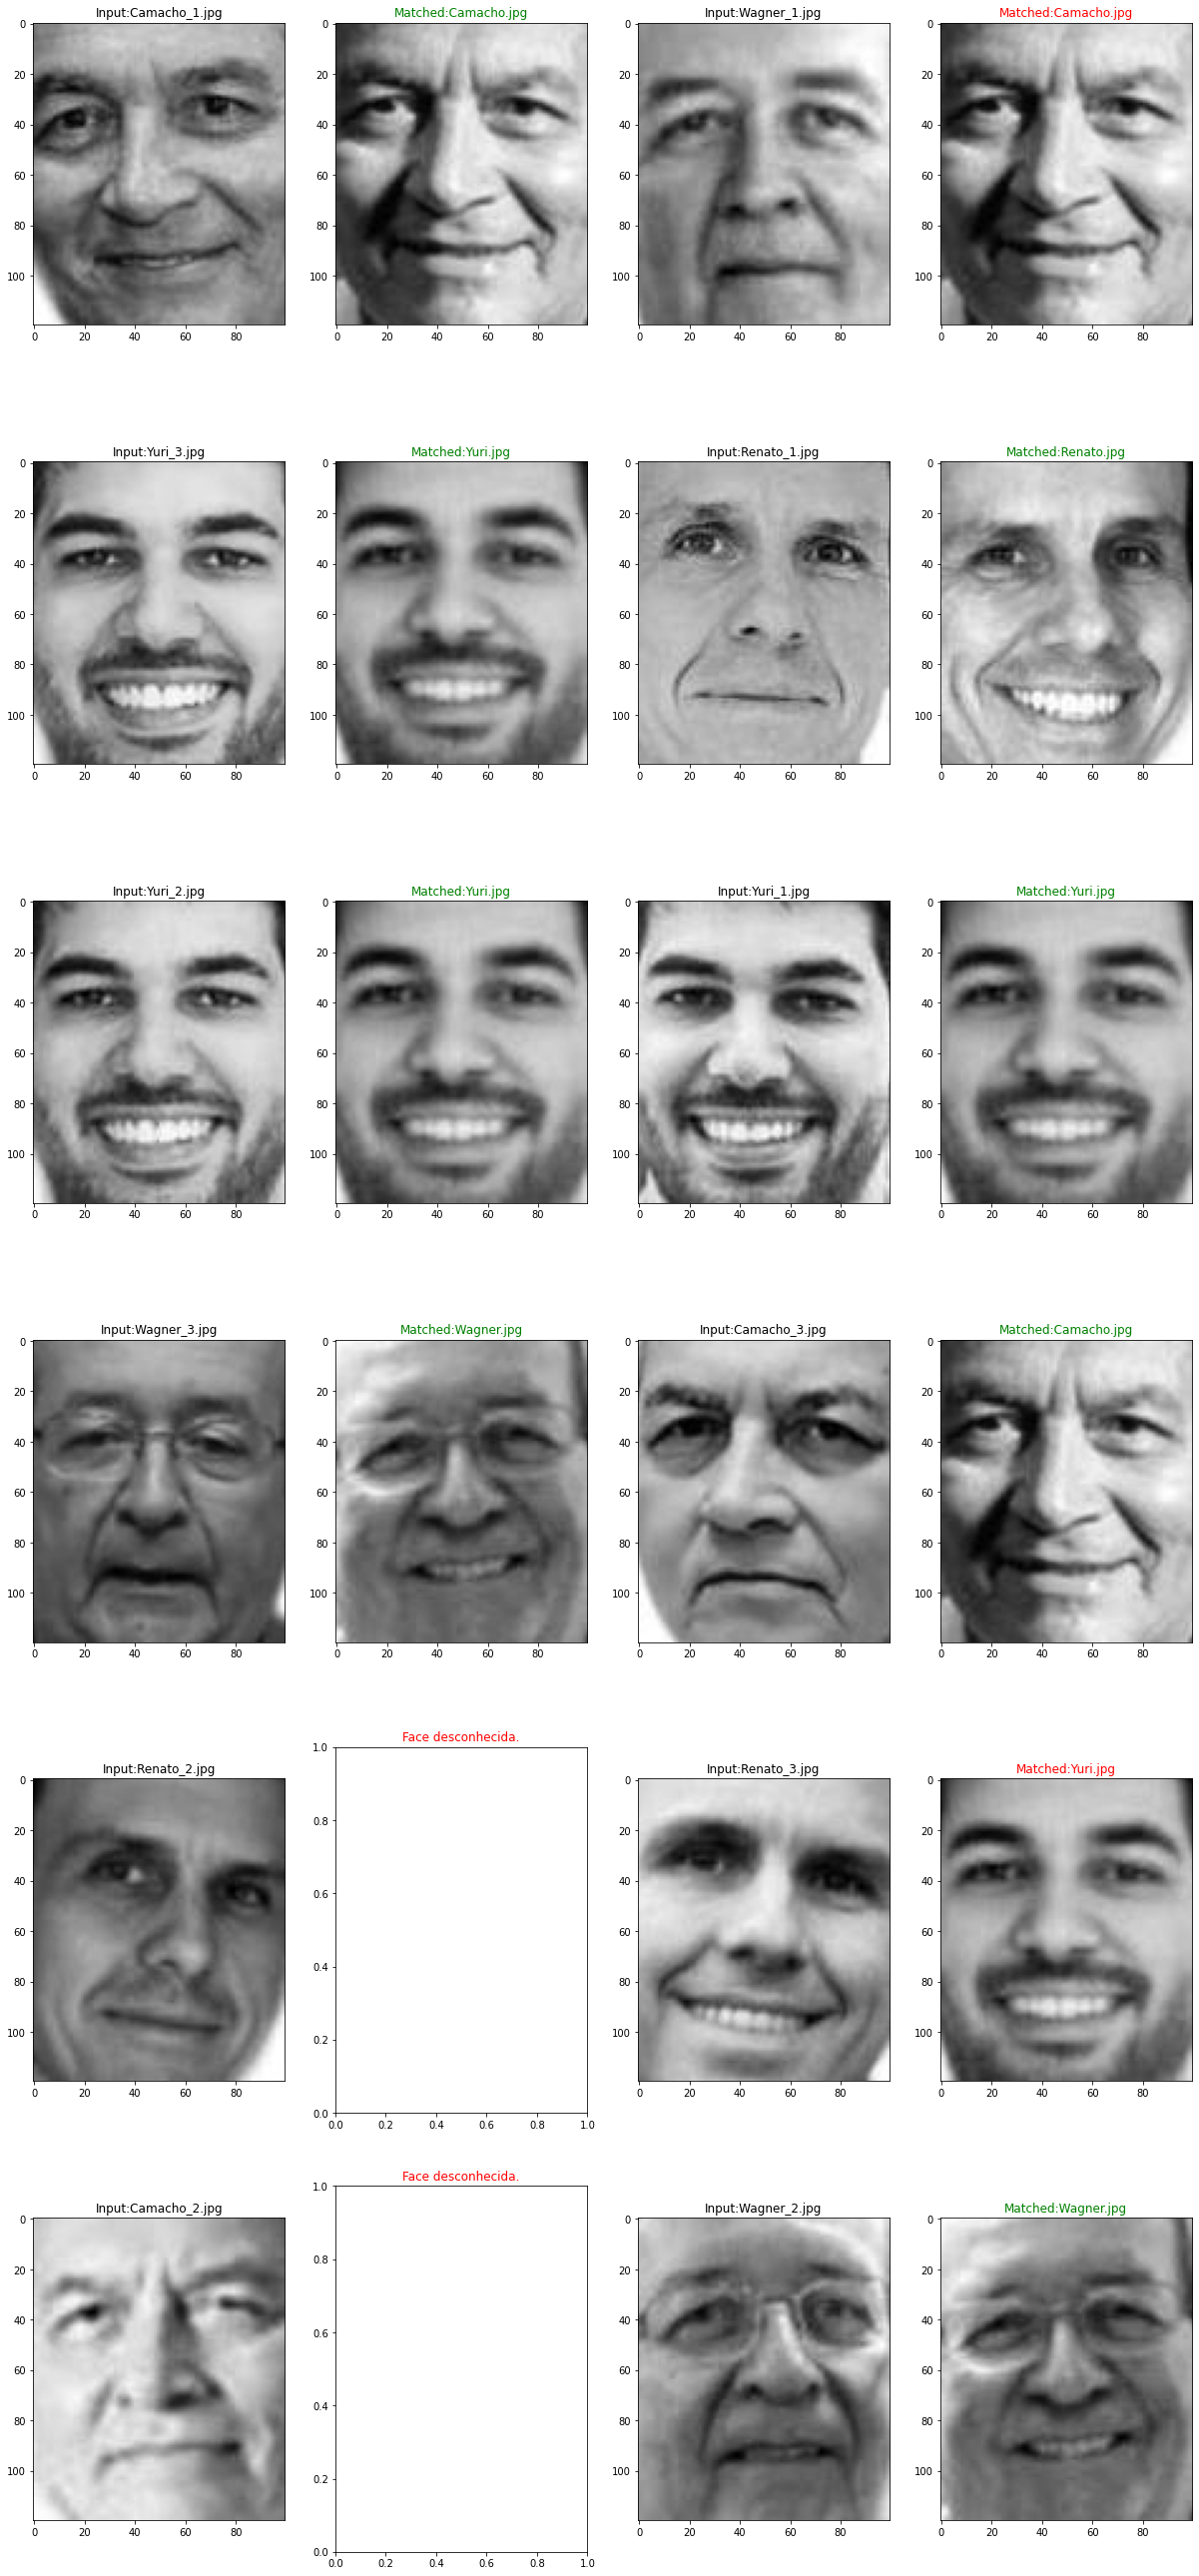

Correct predictions: 8/12 = 66.67


In [ ]:
count, num_imgs, acertos = 0, 0, 0
def eigentest(img, train_images,eigenfaces,weights):
    global count,highest_min,num_imgs,acertos
    face_test = plt.imread(dataset_path+img)
    num_imgs += 1
    face_test_v= np.array(face_test, dtype='float64').flatten()
    normalised_face_test = np.subtract(face_test_v,mean_face)
    
    plt.subplot(6,4,1+count)
    plt.imshow(face_test, cmap='gray')
    plt.title("Input:"+'.'.join(img.split('.')[:2]))
    
    count+=1
    
    weights_test = np.dot(eigenfaces, normalised_face_test)
    dif  = weights - weights_test
    normas = np.linalg.norm(dif, axis=1)
    index = np.argmin(normas)
    t0 = 41800000

    plt.subplot(6,4,1+count)
    if normas[index] < t0:
        if train_images[index].split(".")[0] in img.split("_")[0]:
            plt.title("Matched:"+'.'.join(train_images[index].split('.')[:2]), color='g')
            plt.imshow(imread(dataset_path+train_images[index]), cmap='gray')
            acertos += 1
        else:
            plt.title("Matched:"+'.'.join(train_images[index].split('.')[:2]), color='r')
            plt.imshow(imread(dataset_path+train_images[index]), cmap='gray')
    else:
        if img.split('_')[0] not in [i.split('.')[0] for i in train_images]:
            plt.title('Face desconhecida', color='g')
            acertos += 1
        else:
            plt.title("Face desconhecida.", color='r')
    
    plt.subplots_adjust(right=1.2, top=2.5)
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_images)):
    eigentest(test_images[i], train_images,eigenfaces,weights)

plt.show()

print(f"Correct predictions: {acertos}/{num_imgs} = {round(acertos/num_imgs*100, 2)}")